<a href="https://colab.research.google.com/github/nhatpd/SpeedyIBL/blob/main/speedyIBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Python library to create single or multi Instance-based Learning (IBL) agents that are built based on Instance Based Learning Theory (IBLT) <sup id="a1">[1](#f1)</sup>

* [**Install speedy IBL:**](#Install-speedy-IBL)
* [**Import Libraries**](#Import-Libraries)
* [**Illustration of IBL for Binary Choice Task**](#Illustration-of-IBL-for-Binary-Choice-Task)
* [**Illustration of IBL for Insider Attack Game**](#Illustration-of-IBL-for-Insider-Attack-Game)
* [**Build an IBL Agent with an Equal Delay Feedback Mechanism**](#Build-an-IBL-Agent-with-an-Equal-Delay-Feedback-Mechanism)
* [**Illustration of IBL for Cooperative Navigation**](#Illustration-of-IBL-for-Cooperative-Navigation)
* [**Illustration of IBL for Minimap**](#Illustration-of-IBL-for-Minimap)
* [**Illustration of IBL for Firemen Task**](#Illustration-of-IBL-for-Firemen-Task)
* [**Illustration of IBL for Tasks from GymAI**](#Illustration-of-IBL-for-Tasks-from-GymAI)


## References
<b id="f1">[1]</b> Cleotilde Gonzalez, Javier F. Lerch and Christian Lebiere (2003), [Instance-based learning in dynamic decision making](https://www.sciencedirect.com/science/article/abs/pii/S0364021303000314), Cognitive Science, 27, 591-635. DOI: 10.1016/S0364-0213(03)00031-4.

<b id="f2">[2]</b> Thuy Ngoc Nguyen, Duy Nhat Phan, Cleotilde Gonzalez (2021), [SpeedyIBL: A Solution to the Curse of Exponential Growth in Instance-Based Learning Models of Decisions from Experience](https://pypi.org/project/speedyibl/)

# **Install speedy IBL:**

In [1]:
%pip install -U speedyibl

# **Import Libraries**

In [2]:
from speedyibl import Agent
import random 
import numpy as np
import matplotlib.pyplot as plt

# **Illustration of IBL for Binary Choice Task**
### Task description

In each episode, the agent is required to choose one of two options: Safe or Risky. One option is Safe and it yields a fixed medium outcome (i.e., 3) every time it is chosen. The other option is Risky, and it yields a high outcome (4) with some probability 0.8, and a low outcome (0) with the complementary probability 0.2.

In [ ]:
agent = Agent(default_utility=4.4) #define the agent with default_utility = 4.4, noise = 0.25 decay = 0.5
options = ['safe','risky'] # set of options
runs = 100 # number of runs (participants)
episodes = 100 # number of episodes (trials, rounds)
average_pmax = [] # to store average of performance (proportion of maximum reward expectation choice)

for r in range(runs):
  pmax = []
  agent.reset() #clear the memory for a new run
  for e in range(episodes):     

    choice = agent.choose(options)
    if choice == 'safe':
      agent.respond(3)
    elif random.random() <= 0.8:
      agent.respond(4)
    else:
      agent.respond(0)
    pmax.append(choice == 'risky')
  average_pmax.append(pmax)



**Plot the result**

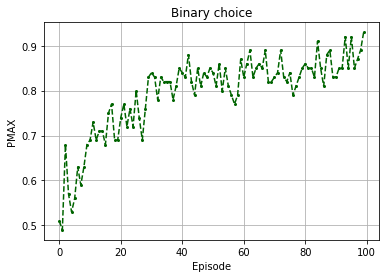

In [ ]:
plt.plot(range(episodes), np.mean(np.asarray(average_pmax),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')

plt.xlabel('Episode')
plt.ylabel('PMAX')
plt.title('Binary choice')
plt.grid(True)
plt.show()

# **Illustration of IBL for Insider Attack Game**
### Task description

In this game, players take the role of the attacker and their goal is to score points by “hacking” computers to steal proprietary data.

In [6]:
TARGETS = [ [ { "payment": 2, "penalty":  -1, "monitored_probability": 0.22 },
              { "payment": 8, "penalty":  -5, "monitored_probability": 0.51 },
              { "payment": 9, "penalty":  -9, "monitored_probability": 0.42 },
              { "payment": 9, "penalty": -10, "monitored_probability": 0.40 },
              { "payment": 2, "penalty":  -6, "monitored_probability": 0.08 },
              { "payment": 5, "penalty":  -5, "monitored_probability": 0.36 } ],
            [ { "payment": 5, "penalty":  -3, "monitored_probability": 0.41 },
              { "payment": 8, "penalty":  -5, "monitored_probability": 0.48 },
              { "payment": 7, "penalty":  -6, "monitored_probability": 0.41 },
              { "payment": 8, "penalty":  -9, "monitored_probability": 0.37 },
              { "payment": 5, "penalty":  -7, "monitored_probability": 0.27 },
              { "payment": 2, "penalty":  -4, "monitored_probability": 0.05 } ],
            [ { "payment": 3, "penalty":  -3, "monitored_probability": 0.30 },
              { "payment": 9, "penalty":  -4, "monitored_probability": 0.60 },
              { "payment": 6, "penalty":  -6, "monitored_probability": 0.40 },
              { "payment": 5, "penalty":  -8, "monitored_probability": 0.29 },
              { "payment": 3, "penalty":  -6, "monitored_probability": 0.20 },
              { "payment": 2, "penalty":  -2, "monitored_probability": 0.20 } ],
            [ { "payment": 4, "penalty":  -3, "monitored_probability": 0.37 },
              { "payment": 6, "penalty":  -3, "monitored_probability": 0.51 },
              { "payment": 7, "penalty":  -7, "monitored_probability": 0.40 },
              { "payment": 5, "penalty": -10, "monitored_probability": 0.24 },
              { "payment": 5, "penalty":  -9, "monitored_probability": 0.26 },
              { "payment": 3, "penalty":  -4, "monitored_probability": 0.23 } ] ]

COVERAGE = [ [ { 2, 6 }, { 2, 4 }, { 2, 5 }, { 2, 4 }, { 1, 3 },
               { 2, 4 }, { 1, 3 }, { 1, 3 }, { 2, 4 }, { 2, 6 },
               { 2, 6 }, { 2, 4 }, { 1, 3 }, { 2, 4 }, { 2, 4 },
               { 1, 3 }, { 3, 6 }, { 2, 4 }, { 2, 4 }, { 3, 6 },
               { 1, 3 }, { 2, 4 }, { 3, 6 }, { 2, 4 }, { 1, 3 } ],
             [ { 2, 5 }, { 1, 3 }, { 1, 3 }, { 3, 6 }, { 1, 3 },
               { 2, 4 }, { 1, 3 }, { 2, 4 }, { 1, 3 }, { 1, 4 },
               { 1, 3 }, { 1, 3 }, { 2, 5 }, { 1, 3 }, { 1, 3 },
               { 1, 3 }, { 2, 5 }, { 2, 4 }, { 2, 4 }, { 1, 3 },
               { 1, 3 }, { 2, 4 }, { 2, 4 }, { 3, 6 }, { 2, 5 } ],
             [ { 2, 5 }, { 3, 6 }, { 2, 4 }, { 2, 5 }, { 2, 5 },
               { 2, 6 }, { 2, 6 }, { 1, 3 }, { 2, 4 }, { 1, 3 },
               { 2, 4 }, { 1, 3 }, { 1, 3 }, { 2, 6 }, { 2, 5 },
               { 1, 3 }, { 2, 4 }, { 1, 3 }, { 2, 4 }, { 2, 5 },
               { 2, 4 }, { 2, 4 }, { 2, 6 }, { 1, 3 }, { 2, 4 } ],
             [ { 2, 5 }, { 1, 4 }, { 3, 6 }, { 2, 6 }, { 1, 3 },
               { 1, 4 }, { 1, 3 }, { 2, 5 }, { 2, 6 }, { 1, 3 },
               { 1, 3 }, { 3, 6 }, { 2, 4 }, { 1, 4 }, { 1, 4 },
               { 1, 3 }, { 1, 3 }, { 1, 4 }, { 1, 3 }, { 2, 5 },
               { 3, 6 }, { 1, 3 }, { 1, 3 }, { 3, 6 }, { 1, 4 } ] ]

TRAINING_COVERAGE = [ { 2, 5 }, { 2, 4 }, { 1 , 3 }, { 1, 3 }, { 1, 3 } ]

SIGNALS = [ [ { 3, 4 }, { 3, 6 }, { 3, 6 }, { 3, 5, 6 }, { 2, 6 },
              { 3, 6 }, { 2, 4}, { 2, 6 }, { 3, 6 }, { 1, 3, 4 },
              { 3, 4 }, { 1, 3 }, { 4, 6 }, { 5}, { 3, 6 },
              { 2, 4 }, { 5 }, { 3 }, { 6 }, { 2, 4 },
              { 2, 4 }, set(), {2, 4, 5 }, { 3 }, { 5, 6 } ],
            [ { 3, 4 }, { 2, 4 }, { 2, 4, 5 }, { 4, 5 }, { 4, 5 },
              { 1, 3, 6 }, { 2 }, { 3 }, { 5 }, set(),
              { 2, 5 }, { 2, 5 }, {3, 4 }, { 2, 5 }, { 2, 4, 5 },
              { 4, 5 }, { 3, 4 }, { 3, 5, 6 }, { 1, 5}, { 2, 5 },
              { 2 }, { 1, 5 }, { 1, 3, 5 }, { 4 }, { 1, 3, 4, 6 } ],
            [ { 1, 3, 6 }, { 2, 4 }, set(), { 1, 3, 4 }, { 3 },
              { 1, 4, 5 }, { 5 }, { 2, 4}, { 1, 3, 5 }, set(),
              { 1, 3, 5 }, { 2 }, { 2, 4, 5 }, { 5 }, { 3, 4 },
              { 2, 4, 5, 6 }, { 1, 3, 5 }, { 2, 4, 6 }, { 1, 3 }, { 1, 4 },
              { 5 }, {3 }, set(), { 2, 5, 6 }, { 1, 3, 5, 6 } ],
            [ { 6 }, { 3 }, { 2, 4 }, { 4, 5}, { 6 },
              { 3, 5 }, { 4 }, { 3, 4, 6 }, { 1, 3, 4, 5 }, { 2, 4, 6 },
              {4, 5 }, { 2, 5 }, { 1, 5, 6 }, { 2, 3, 6 }, { 2, 3 },
              { 5 }, { 2, 4, 5, 6 }, { 2, 3, 5, 6 }, { 2, 4, 5 }, { 1, 3, 4, 6 },
              { 2, 4, 5 }, { 4, 5 }, { 4 }, { 4, 5 }, { 3, 5, 6 } ] ]

TRAINING_SIGNALS = [ { 3, 4 }, {1, 3, 6 }, { 5 }, { 2, 5 }, {2, 4, 5} ]

for clist, slist in zip(COVERAGE, SIGNALS):
    for c, s in zip(clist, slist):
        s.update(c)

TARGET_COUNT = len(TARGETS[0])
BLOCKS = len(TARGETS)
TRIALS = len(COVERAGE[0])

selection_agent = Agent(default_utility=None,mismatchPenalty = 2.5)
attack_agent = Agent(default_utility=None)
selection_agent = Agent(mismatchPenalty = 2.5) #define the agents with default parameters
selection_agent.similarity([0,1], lambda x, y: 1 - abs(x - y) / 10)
selection_agent.similarity([2], lambda x, y: 1 - abs(x -y))

attacks = [0] * BLOCKS * TRIALS

runs = 1000 # number of runs (participants)
data = []

for p in range(runs):
  total = 0
  selection_agent.reset()
  selection_agent.similarity([0,1], lambda x, y: 1 - abs(x - y) / 10)
  selection_agent.similarity([2], lambda x, y: 1 - abs(x -y))
  
  attack_agent.reset()
  dup = random.randrange(5)
  for i in range(5):
      n = random.randrange(TARGET_COUNT)
      x = TARGETS[1][n]
      covered = n + 1 in TRAINING_COVERAGE[i]
      selection_agent.prepopulate((i + 1,
                                                (x["payment"],
                                                x["penalty"],
                                                x["monitored_probability"])),
                                                x["penalty" if covered else "payment"])
      attack_agent.prepopulate((True, n + 1 in TRAINING_SIGNALS[i]),x["penalty" if covered else "payment"])
      if i == dup:
          # x = TARGETS[1][5]
          selection_agent.prepopulate((6,
                                      (x["payment"],
                                      x["penalty"],
                                      x["monitored_probability"])),
                                      x["penalty" if covered else "payment"])
  attack_agent.prepopulate((False,False),0)
  attack_agent.prepopulate((False,True),0)
  attack_agent.prepopulate((True,False),10)
  attack_agent.prepopulate((False,True),5)
  
  for b in range(BLOCKS):
      sds = [ (i + 1,
                                        (x["payment"],
                                        x["penalty"],
                                        x["monitored_probability"]))
                        for x, i in zip(TARGETS[b], range(TARGET_COUNT)) ]

      for t in range(TRIALS):
          selected = selection_agent.choose(sds)[0]
          warned = selected in SIGNALS[b][t]
          pmnt = TARGETS[b][selected - 1]["payment"]
          attack = attack_agent.choose([(True, warned),
                                        (False, warned)])[0]
          covered = selected in COVERAGE[b][t]
          if not attack:
              payoff = 0
          else:
              payoff = TARGETS[b][selected - 1]["penalty" if covered else "payment"]
              attacks[b * 25 + t] += 1
          total += payoff
          attack_agent.respond(payoff)
          selection_agent.respond(payoff)
          data.append([p+1, b+1,t+1,b*25+t+1, selected, int(warned), int(covered),int(attack),payoff, total])



**Plot the result**

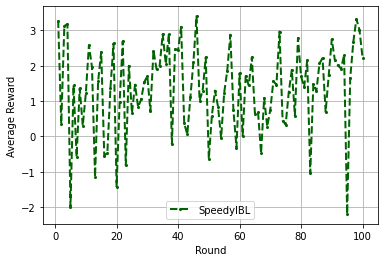

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

plt.plot(range(1,101), df.groupby(3).mean()[8], 'o-', color='darkgreen', markersize=2, linewidth =2, linestyle='--',label='SpeedyIBL')
plt.xlabel('Round')
plt.ylabel('Average Reward')
plt.grid(True)
plt.legend()

# **Build an IBL Agent with an Equal Delay Feedback Mechanism**

This model will be employed to perform the tasks following

In [ ]:
from speedyibl import Agent
from collections import deque
class AgentIBL(Agent):

	# """ Agent """
	def __init__(self, outputs, default_utility = 0.1, Hash = True, delay_feedback = True):
		super(AgentIBL, self).__init__(default_utility=default_utility)
		# '''
		# :param dict config: Dictionary containing hyperparameters
		# '''
		self.outputs = outputs
		self.options = {}
		self.episode_history = []
		self.hash = Hash
		self.delay_feedback = delay_feedback

	def generate_options(self,s_hash):
		self.options[s_hash] = [(s_hash, a) for a in range(self.outputs)]
	
	def move(self, o, explore=True):
		# '''
		# Returns an action from the IBL agent instance.
		# :param tensor: State/Observation
		# '''
		if self.hash:
			s_hash = hash(o.tobytes())
		else:
			s_hash = o
		if s_hash not in self.options:
			self.generate_options(s_hash)
		options = self.options[s_hash]
		choice = self.choose(options)
		self.last_action = choice[1]

		self.current = s_hash

		return self.last_action



	def feedback(self, reward):

		self.respond(reward)

		#episode history
		if self.delay_feedback and (len(self.episode_history) == 0 or self.current != self.episode_history[-1][0]):
			self.episode_history.append((self.current,self.last_action,reward,self.t))
			

	def delayfeedback(self, reward):		
		self.equal_delay_feedback(reward, self.episode_history)

# **Illustration of IBL for Cooperative Navigation**
### Task description

In this task, three agents must cooperate through physical actions to reach a set of three landmarks (3 green landmarks). The agents can observe the relative positions of other agents and landmarks, and are collectively rewarded based on the number of the landmarks that they cover. For instance, if all the agents cover only one landmark, they receive one point. By contrast, if they all can cover the three landmarks, they got the maximum of three points. Simply put, the agents want to cover all of the landmarks, so they need to learn to coordinate the landmark they must cover.

Install and call the cooperative navigation environment

In [ ]:
!pip install -U vitenv
from vitenv import Environment
env = Environment('NAVIGATION_V1')

Run experiments

In [ ]:
runs = 100
episodes = 100
steps = 2500
number_agents = 3

data = []

from copy import deepcopy

for run in range(runs):

  agents = []
  for i in range(number_agents): 
      agents.append(AgentIBL(env.out,default_utility=2.5)) # Init agent instances

  for i in range(episodes):
      
    # Run episode
    observations = env.reset() # Get first observations
    episode_reward = 0

    for j in range(steps):
      if j == steps-1:
          env.env.t_episode = True
      #######################################
      arriveds = deepcopy(env.env.arriveds)
      actions = [4,4,4]
      for a in range(number_agents):
          if not arriveds[a]:
              actions[a] = agents[a].move(observations[a])

      observations, rewards, t = env.step(actions)

      if j == steps-1:
          t = True

      for a, r in zip(range(number_agents),rewards):
          if not arriveds[a]: 
              agents[a].feedback(r)  
      if t:         
          for agent, r in zip(agents, rewards):
            if r > 0:
              agent.delayfeedback(r) 
            agent.episode_history = []


      episode_reward += rewards[0]
      if t: 
        break # If t then terminal state has been reached
    data.append([run, i, j, episode_reward])
  # print('Finished ', run, '-th run')

Plot results

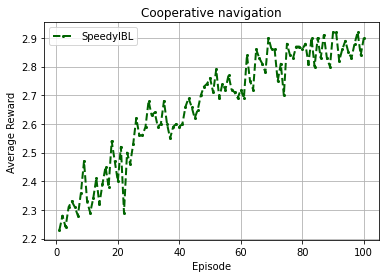

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

plt.plot(range(1,101), df.groupby(1).mean()[3], 'o-', color='darkgreen', markersize=2, linewidth =2, linestyle='--',label='SpeedyIBL')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Cooperative navigation')
plt.grid(True)
plt.legend()

# **Illustration of IBL for Minimap**
### Task description

The task is inspired by a search and rescue scenario, which involves an agent being placed in a building with multiple rooms and tasked with rescuing victims. 
Victims have been scattered across the building and their injuries have different degrees of severity with some needing more urgent care than others. In particular, there are 34 victims grouped into two categories (24 green victims and 10 yellow victims). There are many obstacles (walls) placed in the path forcing the agent to look for alternate routes. The agent's goal is to rescue as many of these victims as possible. The task is simulated as a $93 \times 50$ grid of cells which represents one floor of this building. Each cell is either empty, an obstacle or a victim. The agent can choose to move left, right, up or down, and only move one cell at a time. 

Install and call the MINIMAP environment


In [ ]:
!pip install -U vitenv
from vitenv import Environment
env = Environment('MINIMAP_V1')

Run experiments

In [ ]:
runs = 5
episodes = 100
steps = 2500
number_agents = 3

data = []

for run in range(runs):

  
  agent = AgentIBL(env.out,default_utility=0.1) # Init agent instances

  for i in range(episodes):
      
    # Run episode
    observation = env.reset() # Get first observations
    episode_reward = 0

    for j in range(steps):
      #######################################
      action = agent.move(observation)

      observation, reward, t = env.step(action)

      if j == steps-1:
          t = True

      agent.feedback(reward)
      if reward > 0:
          agent.delayfeedback(reward)
          episode_reward += reward 
          agent.episode_history = []

      if t: 
        agent.episode_history = [] 
        break # If t then terminal state has been reached
    data.append([run, i, j, episode_reward])
  print('Finished ', run, '-th run')

Finished  0 -th run
Finished  1 -th run
Finished  2 -th run
Finished  3 -th run
Finished  4 -th run


Plot the result

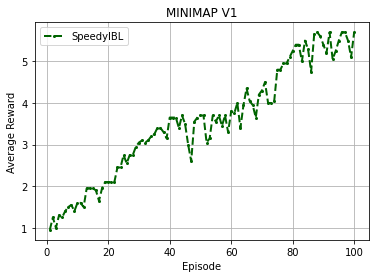

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

plt.plot(range(1,101), df.groupby(1).mean()[3], 'o-', color='darkgreen', markersize=2, linewidth =2, linestyle='--',label='SpeedyIBL')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('MINIMAP V1')
plt.grid(True)
plt.legend()

# **Illustration of IBL for Firemen Task**
### Task description

The task replicates the coordination in firefighting service wherein agents need to pick up matching items for extinguishing fire. The task is simulated in a gridworld of size $11\times 14$. Two agents located within the gridworld are tasked with locating an equipment pickup area and choosing one of the firefight items. Afterwards, they need to navigate and find the location of fire (F) to extinguish it. The task is fully cooperative as both agents are required to extinguish one fire.

Install and call the FIREMAN environment

In [ ]:
!pip install -U vitenv
from vitenv import Environment
env = Environment('FIREMEN_V1')

Run experiments

In [ ]:
runs = 10
episodes = 100
steps = 2500
number_agents = 2

data = []

from copy import deepcopy

for run in range(runs):

  agents = []
  for i in range(number_agents): 
      agents.append(AgentIBL(env.out,default_utility=13)) # Init agent instances

  for i in range(episodes):
      
    # Run episode
    observations = env.reset() # Get first observations
    episode_reward = 0

    for j in range(steps):
      #######################################
      actions = []
      for agent, o in zip(agents,observations):
          actions.append(agent.move(o))
      observations, rewards, t = env.step(actions)

      for agent, r in zip(agents, rewards):
        agent.feedback(r)  
      if t:         
          for agent, r in zip(agents, rewards):
            agent.delayfeedback(r) 
            agent.episode_history = []

      if j == steps-1:
          t = True

      episode_reward += rewards[0]
      if t: 
        for agent in agents:
          agent.episode_history = []
        break # If t then terminal state has been reached
    data.append([run, i, j, episode_reward])
  print('Finished ', run, '-th run')

Finished  0 -th run
Finished  1 -th run
Finished  2 -th run
Finished  3 -th run
Finished  4 -th run
Finished  5 -th run
Finished  6 -th run
Finished  7 -th run
Finished  8 -th run
Finished  9 -th run


Plot the result

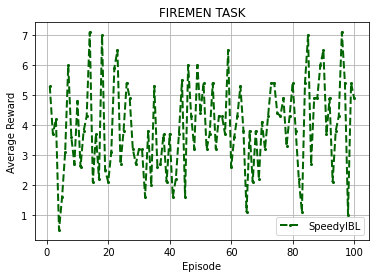

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

plt.plot(range(1,101), df.groupby(1).mean()[3], 'o-', color='darkgreen', markersize=2, linewidth =2, linestyle='--',label='SpeedyIBL')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('FIREMEN TASK')
plt.grid(True)
plt.legend()

# **Illustration of IBL for Tasks from GymAI**

Install and call the CartPole Task

In [ ]:
%pip install gym
import gym 
env = gym.make('CartPole-v1')

Run experiments

In [ ]:
runs = 100
episodes = 100
steps = 2500
number_agents = 1

data = []

for run in range(runs):

  
  agent = AgentIBL(env.action_space.n,default_utility=11) # Init agent instances

  for i in range(episodes):
      
    # Run episode
    observation = env.reset() # Get first observations
    episode_reward = 0

    for j in range(steps):
      #######################################
      action = agent.move(observation)

      observation, reward, t, info = env.step(action)

      if j == steps-1:
          t = True

      agent.feedback(reward)
      if reward > 0:
          agent.delayfeedback(reward)
          episode_reward += reward 
          agent.episode_history = []

      if t: 
        agent.episode_history = [] 
        break # If t then terminal state has been reached
    data.append([run, i, j, episode_reward])
  # print('Finished ', run, '-th run')

Plot the result

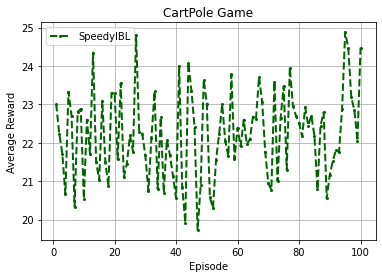

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

plt.plot(range(1,episodes+1), df.groupby(1).mean()[3], 'o-', color='darkgreen', markersize=2, linewidth =2, linestyle='--',label='SpeedyIBL')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('CartPole Game')
plt.grid(True)
plt.legend()